In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [4]:
reconstruction_loss_sw = {
    'CAE (1024)': 0.08411,
    'AEflow (1024)': 0.07821,
    'FourierNetLatlon (400)': 0.05977,
    'FourierNetCartes (400)': 0.05107,
    'SINRNoSkip (400)': 0.04201,
    'SINR (400)': 0.04156,
}
reconstruction_loss_era5 = {
    'CAE': 0.0944, #! copied from previous results
    'AEflow': 0.1058, 
    'SINR': 0.07821,
}

In [5]:
df1 = pd.DataFrame.from_dict({'ROM': list(reconstruction_loss_sw.keys()), 'reconstruction loss': list(reconstruction_loss_sw.values())})
df1['dataset'] = 'shallow-water'
df2 = pd.DataFrame.from_dict({'ROM': list(reconstruction_loss_era5.keys()), 'reconstruction loss': list(reconstruction_loss_era5.values())})
df2['dataset'] = 'ERA5'
df = pd.concat([df1, df2], axis=0)
df

,ROM,reconstruction loss,dataset
0,CAE (1024),0.08411,shallow-water
1,AEflow (1024),0.07821,shallow-water
2,FourierNetLatlon (400),0.05977,shallow-water
3,FourierNetCartes (400),0.05107,shallow-water
4,SINRNoSkip (400),0.04201,shallow-water
5,SINR (400),0.04156,shallow-water
0,CAE,0.09440,ERA5
1,AEflow,0.10580,ERA5
2,SINR,0.07821,ERA5


[Text(0, 0, '0.0944'), Text(0, 0, '0.1058'), Text(0, 0, '0.07821')]

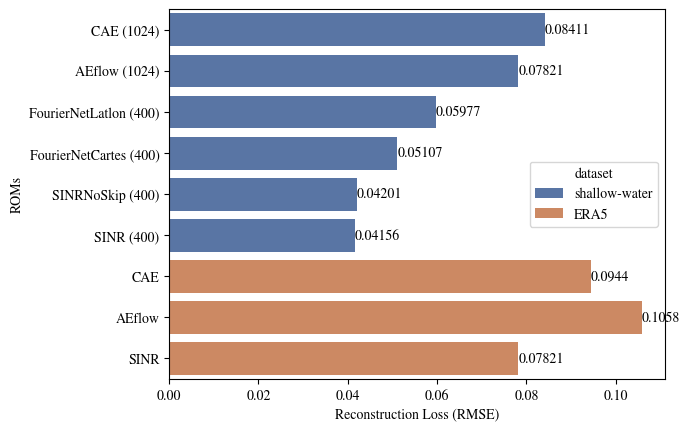

In [6]:
ax = sns.barplot(data=df, orient='h', y='ROM', x='reconstruction loss', hue='dataset', palette='deep')
# palette='deep', 'pastel'
# see https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial for palette configurations
ax.set_ylabel('ROMs')
ax.set_xlabel('Reconstruction Loss (RMSE)')
ax.bar_label(ax.containers[0], fmt='%.4g', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.4g', label_type='edge')
# plt.savefig('reconstruction_loss.pdf', bbox_inches='tight', pad_inches=0.01)

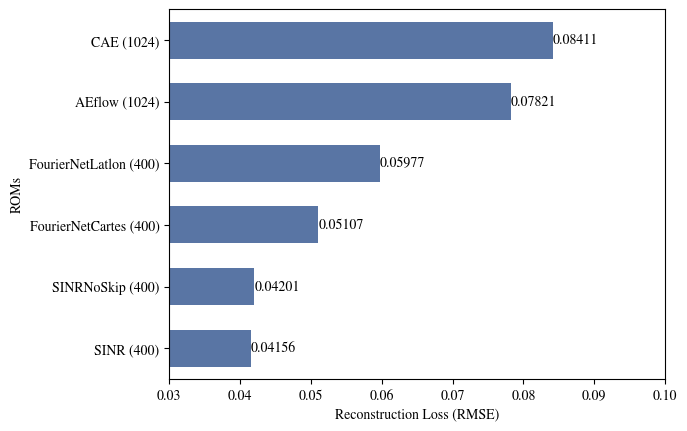

In [7]:
colors = sns.palettes.color_palette('deep', n_colors=6)
ax = sns.barplot(data=df[df['dataset'] == 'shallow-water'], orient='h', x='reconstruction loss', y='ROM',
                 color=colors[0],
                 width=.6
                 )
# palette='deep', 'pastel'
# see https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial for palette configurations
ax.set_ylabel('ROMs')
ax.set_xlabel('Reconstruction Loss (RMSE)')
ax.set_xlim(0.03, 0.1)
ax.bar_label(ax.containers[0], fmt='%.4g', label_type='edge')
plt.savefig('reconstruction_loss-sw.pdf', bbox_inches='tight', pad_inches=0.01)

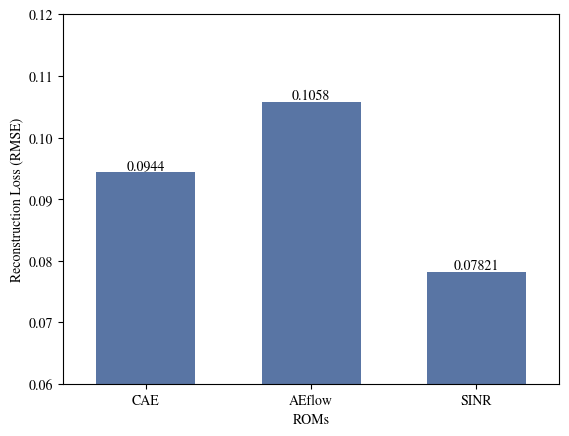

In [9]:
colors = sns.palettes.color_palette('deep', n_colors=6)
ax = sns.barplot(data=df[df['dataset'] == 'ERA5'], y='reconstruction loss', x='ROM',
                 color=colors[0],
                 width=.6
                 )
# palette='deep', 'pastel'
# see https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial for palette configurations
ax.set_xlabel('ROMs')
ax.set_ylabel('Reconstruction Loss (RMSE)')
ax.set_ylim(0.06, 0.12)
ax.bar_label(ax.containers[0], fmt='%.4g', label_type='edge')
plt.savefig('reconstruction_loss-era5.pdf', bbox_inches='tight', pad_inches=0.01)